# 1.1. Теоретический материал – Линейные регрессионные модели
### Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f(x)=b+m*x, где m – наклон линии, а b – его сдвиг.

### Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением 𝑦(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.
### Задача экcтраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

## 1.1.1 Пример
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [31]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1,0.2, 0.9, 2.1])

A=np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [32]:
m,c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m,c)

0.9999999999999999 -0.9499999999999997


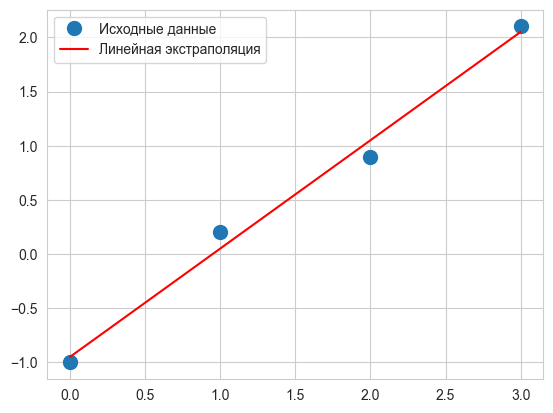

In [33]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

### 1.1.2 Пример
Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома a,b,c по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [34]:
from numpy import *
from numpy.random import *
import numpy as np

delta = 1.0
x=linspace(-5,5,11)
y=x**2+delta*(rand(11)-0.5)

x+=delta*(rand(11)-0.5)
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x=fromfile('x_data.txt',float, sep='\n' )
y=fromfile('y_data.txt',float, sep='\n' )

print(x)
print(y)

[-5.24141128 -4.27467082 -2.94895216 -1.66850255 -0.59545904  0.11689912
  0.72876702  2.28831185  2.73394792  3.67543344  5.20467795]
[24.79871331 16.31211757  8.95213919  4.403477    1.06401981 -0.17257041
  1.29767415  4.12899871  9.11689573 16.07257126 25.05520481]


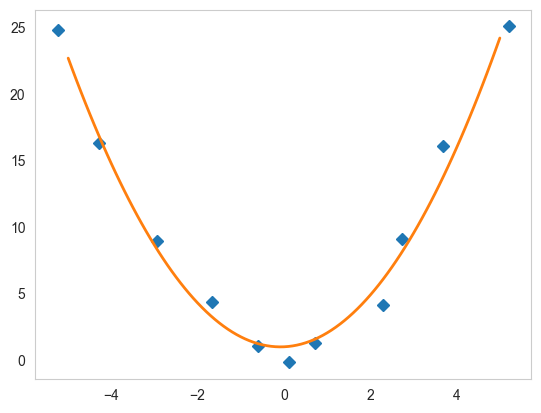

In [35]:
m = vstack((x**2, x, ones(11))).T 
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэф
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

## 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

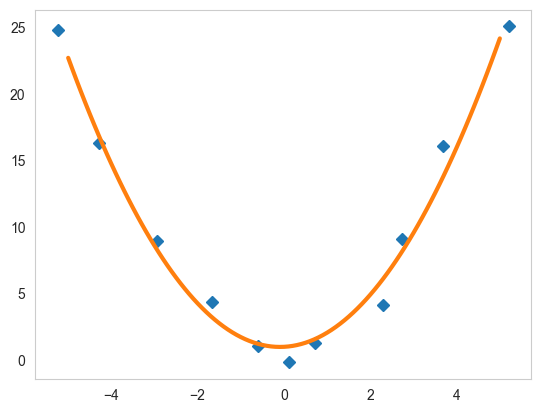

In [36]:
m2= vstack((x**3, x**2, x, ones(11))).T
s=np.linalg.lstsq(m2,y, rcond=None)[0]
x_prec = linspace(-5,5,101)

plt.plot(x,y,'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]* x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)

plt.grid()
plt.savefig('x1.png')

## Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

Экстраполяция полиномом 1-ой степени
x = [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y = [ 3  1 -4 -2  1 -2 -4  2  2 -2  2]


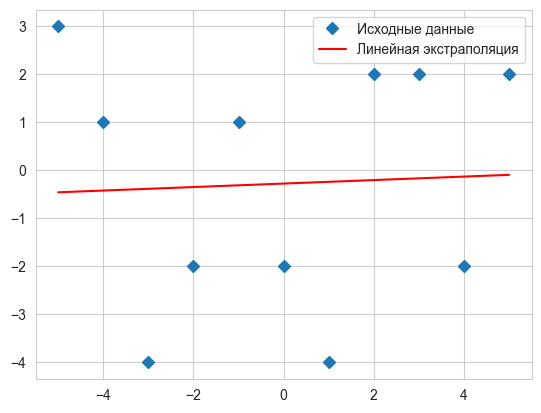

Экстраполяция полиномом 2-ой степени
x = [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y = [ 3  1 -4 -2  1 -2 -4  2  2 -2  2]


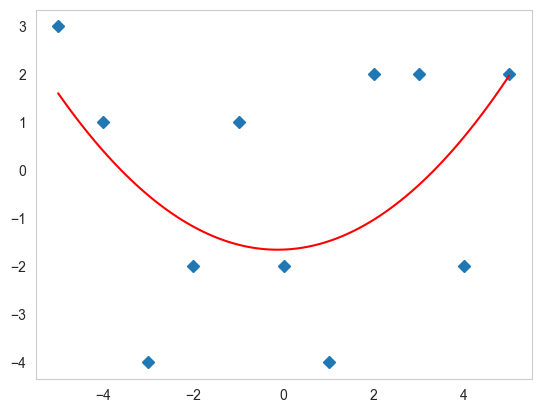

Экстраполяция полиномом 3-ей степени
x = [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y = [ 3  1 -4 -2  1 -2 -4  2  2 -2  2]


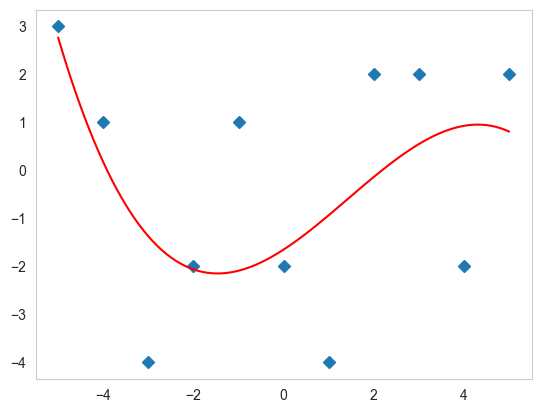

In [81]:

from numpy import *
import matplotlib.pyplot as plt

x = linspace(-5,5,11)
y = random.randint(-5,5,11)

print('Экстраполяция полиномом 1-ой степени')
print('x =', x)
print('y =', y)
A = vstack([x, ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

print('Экстраполяция полиномом 2-ой степени')
print('x =', x)
print('y =', y)
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], 'r', label='Линейная экстраполяция')
plt.grid()
plt.show()

print('Экстраполяция полиномом 3-ей степени')
print('x =', x)
print('y =', y)
m = vstack((x**3, x**2, x, ones(11))).T
s= linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], 'r', label='Линейная экстраполяция')
plt.grid()
plt.show()


## 1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривую вида f(x,b) = b0 +b1exp(-b2x**2)


In [38]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами 
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек хі 
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) # зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))

In [39]:
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных 
from scipy import *


beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt


array([0.26074292, 0.76621853, 0.52630584])

In [40]:
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 
print(fres)


0.0003013208621353991
0.15613015750123008


In [41]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.0147848  1.07987604 0.97487929 0.92056477 1.05609294 0.90926763
 0.85580455 0.86953057 0.72874635 0.80269106 0.73089199 0.66275732
 0.55375408 0.54682401 0.51212103 0.57664251 0.48749153 0.46274797
 0.47440313 0.270731   0.37918942 0.18366302 0.2634702  0.28417103
 0.29835546 0.28606304 0.25593133 0.3301621  0.19920992 0.27926228
 0.24830726 0.25849704 0.243201   0.25326357 0.31009745 0.23709438
 0.19334493 0.23639499 0.24076234 0.23

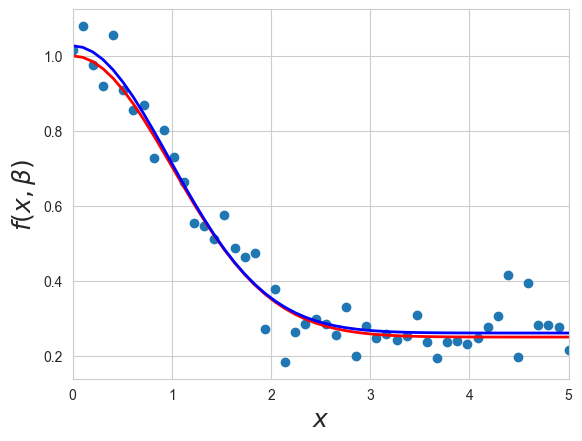

In [42]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

## 1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:
1) f(x,b) = b0 +b1x
2) f(x) = b0 +b1x +b2x^2
3) f(x,b) = b0 +b1ln(x)
4) f(x,b) = b0 + x^b1

[0.23402712 0.7557762 ]
0.00012836366406927696
0.15613015750123008


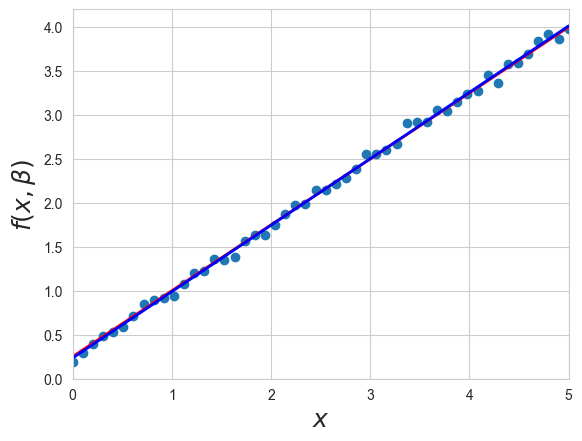

In [43]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals - ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()


In [44]:
#решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25,0.75,0.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хі
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)


[0.2476067  0.74444202 0.50306125]
0.00018689780883525913
0.1558532058354223


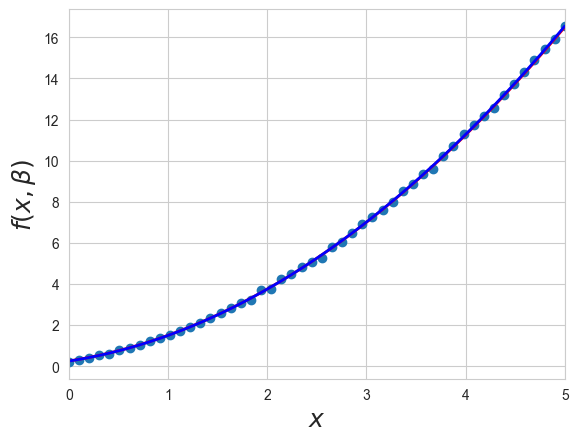

In [45]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()


In [46]:
#решение
#3 #Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 
print(fres)


[1.0069221  1.99249473]
5.426008558368037e-05
0.1254732628036422


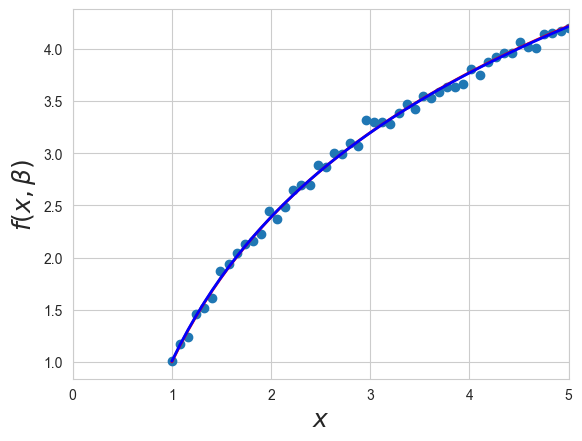

In [47]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()


In [48]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами
b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev= sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.00015822 2.00011609]
5.692514661830852e-06
0.13542221876553742


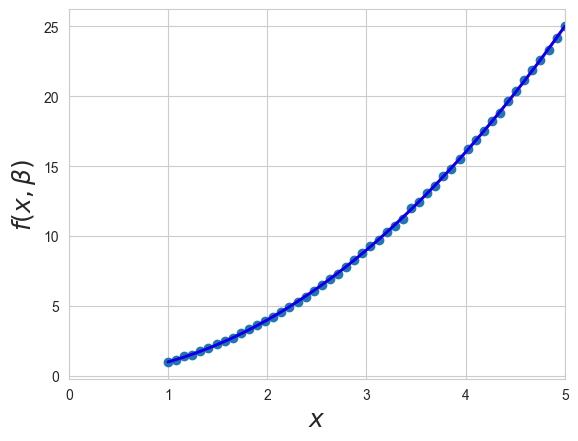

In [49]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

## Задание:
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

In [50]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0/x+b1
# зададим массив точек xі
xdata = np.linspace(1, 15, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev= sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.05852372 1.98985867]
0.0007837404111650432
0.0847992220347514


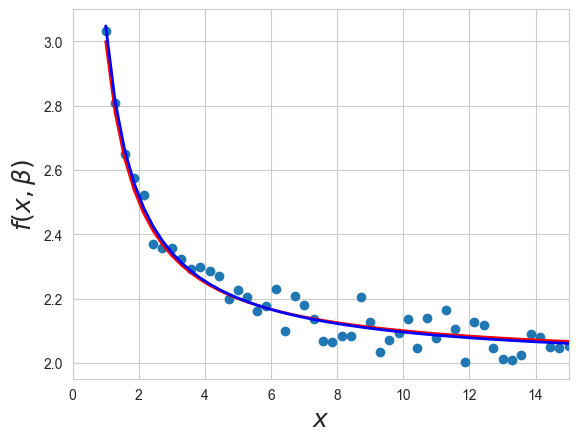

In [51]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 15)
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

# 1.2. Теоретический материал – Задачи регрессии 
## Линейная регрессия 
Это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной регрессией. 
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

## 1.2.1 Пример
Задача: Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью 
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()


,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [53]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


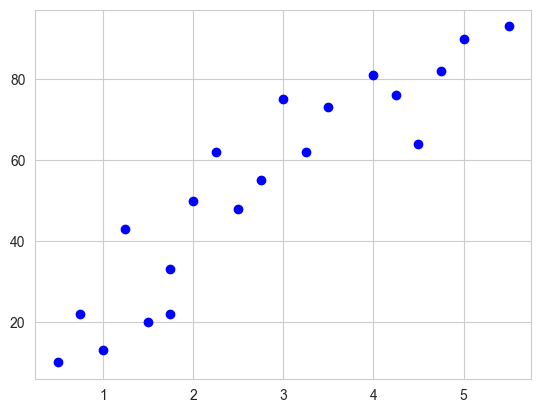

In [54]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "Данные экзамена")
plt.show()


In [55]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(len(X))
print(len(y))


20
20


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

5.475400029908791
[17.02706744]


In [57]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Pred':y_pred})
df

,Actual,Pred
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


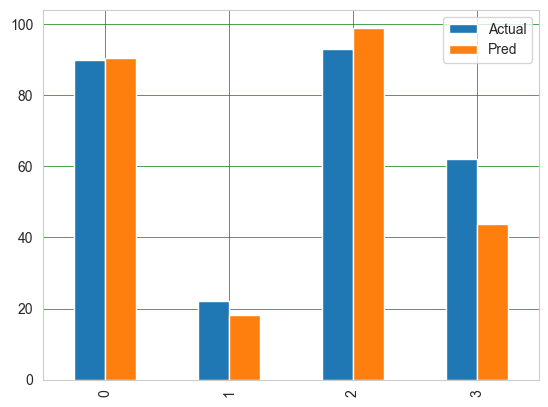

In [58]:
df.plot(kind = 'bar')
plt.grid(which='major', linestyle='-', linewidth = '0.5', color ='green')
plt.grid(which='minor', linestyle=':', linewidth = '0.5', color ='black')
plt.show()

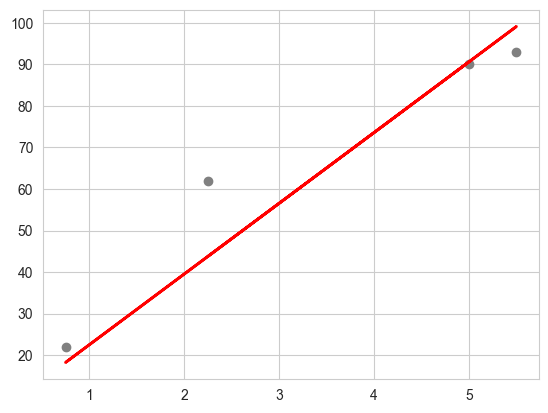

In [59]:
plt.scatter(X_test, y_test, color = "grey")
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

## Задание: 
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
 (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
 Найдите коэффициенты линии регрессии. Постройте прогноз.

In [60]:
url ="https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataframe_1=pd.read_csv(url)
print(dataframe_1.head(3))

dataset = pd.DataFrame(dataframe_1)
dataset.head()



   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [61]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


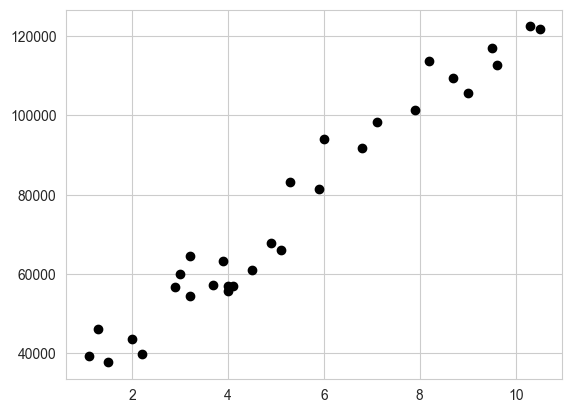

In [62]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color="black")
plt.show()

In [63]:
X = dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [65]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [66]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Pred':y_pred})
df

,Actual,Pred
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


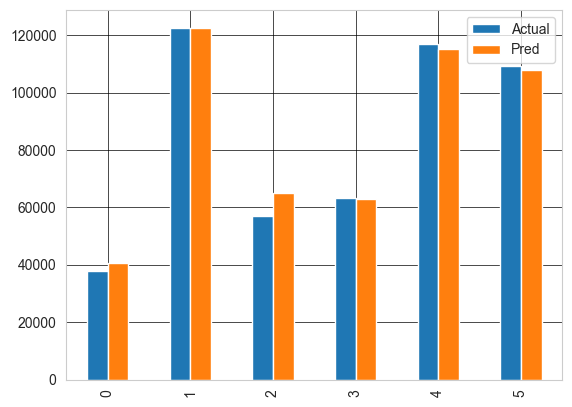

In [67]:
df.plot(kind ='bar')
plt.grid(which='major', linestyle = '-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle = ':', linewidth='0.5', color='green')



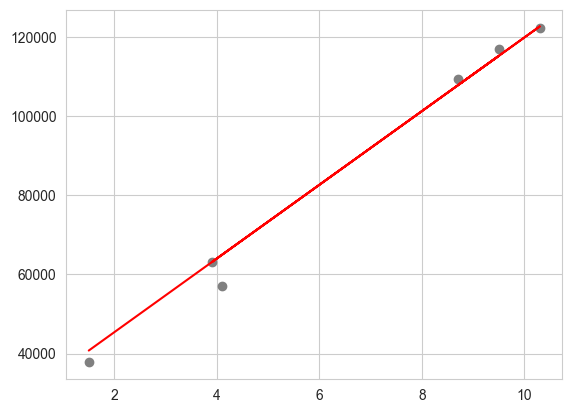

In [68]:
plt.scatter(X_test, y_test, color ='grey')
plt.plot(X_test, y_pred, color='red')

plt.show()

## Задача.
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [69]:
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"

dataframe=pd.read_csv(url)

dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [70]:
print(dataframe.shape)
dataframe.describe()


(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [71]:
X=dataframe[['Average_income','Paved_Highways', 'Petrol_tax']]
Y=dataframe["Population_Driver_licence(%)"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.01, random_state=False)

In [73]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeff'])
coeff_df

,Coeff
Average_income,0.000016
Paved_Highways,-0.000005
Petrol_tax,-0.024750


In [75]:
y_pred = regressor.predict(X_test)
df = DataFrame({'Actual':y_test, 'Pred': y_pred})
df

,Actual,Pred
29,0.493,0.532588


In [76]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

0.001567216319911294


## Задача
Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

Выбран вариант 10

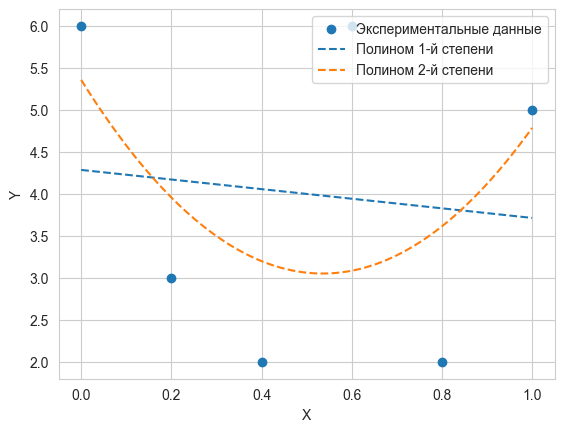

In [77]:
from scipy.optimize import curve_fit

X_data = np.array([.0, .2, .4, .6, .8, 1.])
Y_data = np.array([6., 3., 2., 6., 2., 5.])

# Определение функций для аппроксимации (полиномы первой и второй степени)
def linear_function(x, a, b):
    return a * x + b

def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Подгонка параметров с использованием метода наименьших квадратов
linear_params, _ = curve_fit(linear_function, X_data, Y_data)
quadratic_params, _ = curve_fit(quadratic_function, X_data, Y_data)

# Создание значений для построения графиков
x_values = np.linspace(min(X_data), max(X_data), 100)

# Вычисление значений для полиномов
linear_fit = linear_function(x_values, *linear_params)
quadratic_fit = quadratic_function(x_values, *quadratic_params)

# Построение графиков
plt.scatter(X_data, Y_data, label='Экспериментальные данные')
plt.plot(x_values, linear_fit, label='Полином 1-й степени', linestyle='--')
plt.plot(x_values, quadratic_fit, label='Полином 2-й степени', linestyle='--')

# Добавление названий осей и легенды
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Вывод графика
plt.show()